In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import folium


In [105]:
crime_data = pd.read_csv("/Users/dearishanti/Desktop/hacktiv/H8_4/data/london_crime_by_lsoa.csv")
crime_data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [106]:
crime_data.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [107]:
crime_data.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [108]:
crime_data.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603])

In [109]:
crime_data.shape

(13490604, 7)

In [110]:
crime_data.dtypes

lsoa_code         object
borough           object
major_category    object
minor_category    object
value              int64
year               int64
month              int64
dtype: object

In [111]:
crime_data.describe(include='all')

,lsoa_code,borough,major_category,minor_category,value,year,month
count,13490604,13490604,13490604,13490604,1.349060e+07,1.349060e+07,1.349060e+07
unique,4835,33,9,32,NaN,NaN,NaN
top,E01003689,Croydon,Theft and Handling,Common Assault,NaN,NaN,NaN
freq,3456,602100,3966300,522180,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.779444e-01,2.012000e+03,6.500000e+00
std,NaN,NaN,NaN,NaN,1.771513e+00,2.581989e+00,3.452053e+00
min,NaN,NaN,NaN,NaN,0.000000e+00,2.008000e+03,1.000000e+00
25%,NaN,NaN,NaN,NaN,0.000000e+00,2.010000e+03,3.750000e+00
50%,NaN,NaN,NaN,NaN,0.000000e+00,2.012000e+03,6.500000e+00
75%,NaN,NaN,NaN,NaN,1.000000e+00,2.014000e+03,9.250000e+00


In [112]:
crime_data.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [113]:
crime_data[['borough', 'major_category', 'minor_category', 'value', 'year']]

,borough,major_category,minor_category,value,year
0,Croydon,Burglary,Burglary in Other Buildings,0,2016
1,Greenwich,Violence Against the Person,Other violence,0,2016
2,Bromley,Violence Against the Person,Other violence,0,2015
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016
4,Wandsworth,Robbery,Personal Property,0,2008
...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015
13490600,Hillingdon,Robbery,Personal Property,1,2015
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011
13490602,Croydon,Robbery,Business Property,0,2011


#### area plot crime by borough per tahun


In [114]:
#pivot untuk mengetahui angka pasti crime per tahun
crime_by_year_borough = pd.pivot_table(crime_data, values='value', index=['year'], columns=['borough'], aggfunc=sum)


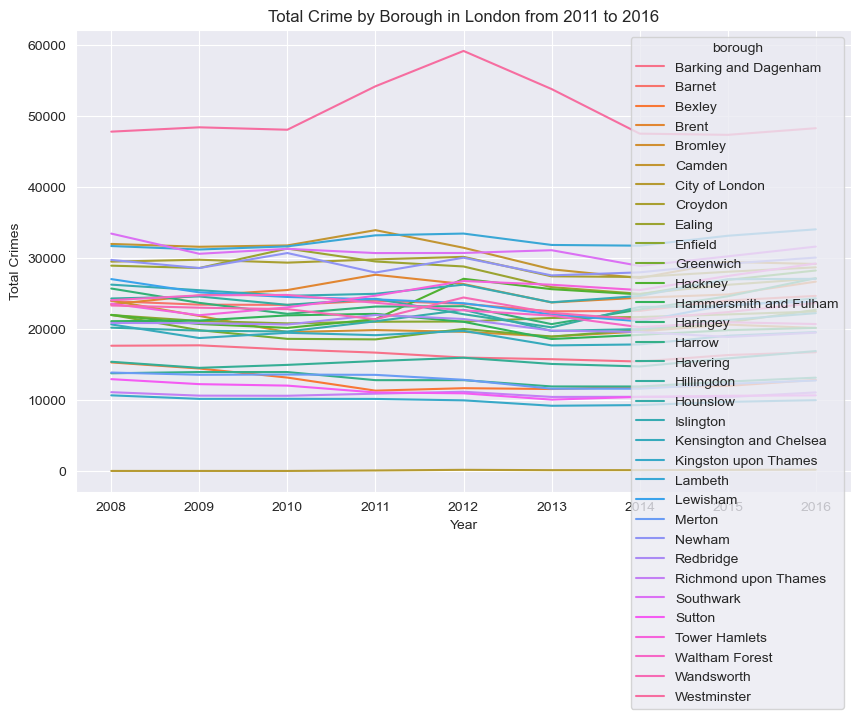

In [115]:
#area plot dengan seaborn
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.lineplot(data=crime_by_year_borough, dashes=False)
plt.title('Total Crime by Borough in London from 2011 to 2016')
plt.ylabel('Total Crimes')
plt.xlabel('Year')
plt.show()

##### histogram untuk angka crime per bulan

In [116]:
crime_data['month'].head

<bound method NDFrame.head of 0           11
1           11
2            5
3            3
4            6
            ..
13490599     2
13490600     6
13490601     2
13490602     5
13490603     6
Name: month, Length: 13490604, dtype: int64>

In [117]:
count, bin_edges = np.histogram(crime_data['month'])
print(count)
print(bin_edges)

[2248434 1124217 1124217 1124217 1124217 1124217 1124217 1124217 1124217
 2248434]
[ 1.   2.1  3.2  4.3  5.4  6.5  7.6  8.7  9.8 10.9 12. ]


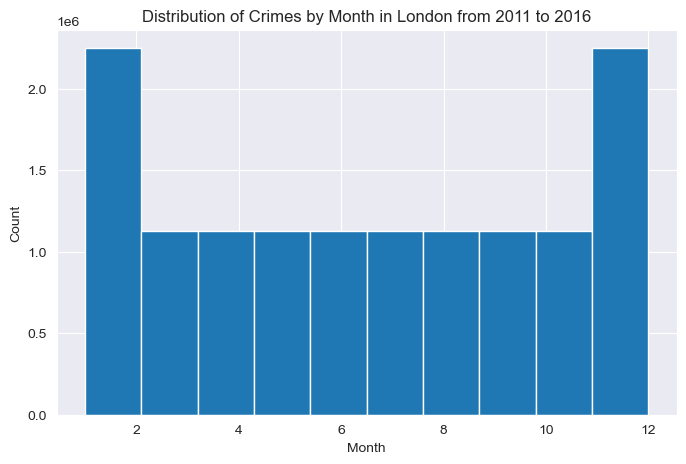

In [118]:
crime_data['month'].plot(kind='hist', figsize=(8, 5))

plt.title('Distribution of Crimes by Month in London from 2011 to 2016')
plt.xlabel('Month')
plt.ylabel('Count')

plt.show()

#### bar chart untuk tau top 10 borough dengan total kejahatan tertinggi


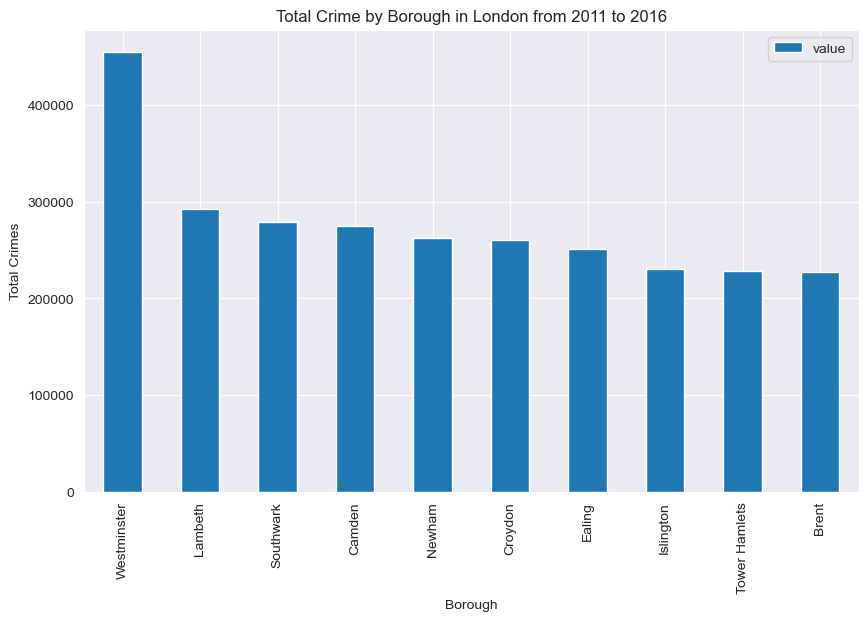

In [119]:
crime_by_borough = pd.pivot_table(crime_data, values='value', index=['borough'], aggfunc=sum)
crime_by_borough = crime_by_borough.sort_values(by='value', ascending=False).head(10)

crime_by_borough.plot(kind='bar', figsize=(10, 6))

plt.title('Total Crime by Borough in London from 2011 to 2016')
plt.xlabel('Borough')
plt.ylabel('Total Crimes')
plt.show()

#### pie chart per kategori major crime

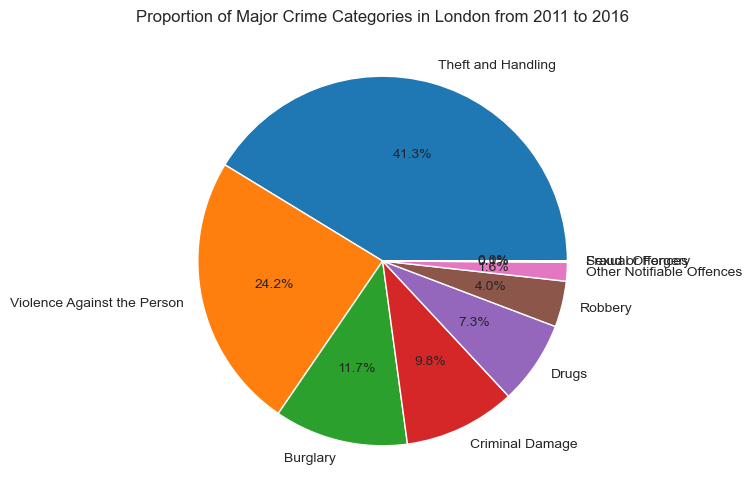

In [120]:
crime_by_category = pd.pivot_table(crime_data, values='value', index=['major_category'], aggfunc=sum)
crime_by_category = crime_by_category.sort_values(by='value', ascending=False)

plt.figure(figsize=(10, 6))
plt.pie(crime_by_category['value'], labels=crime_by_category.index, autopct='%1.1f%%')
plt.title('Proportion of Major Crime Categories in London from 2011 to 2016')
plt.show()


#### box plot distribusi total kejahatan per tahun

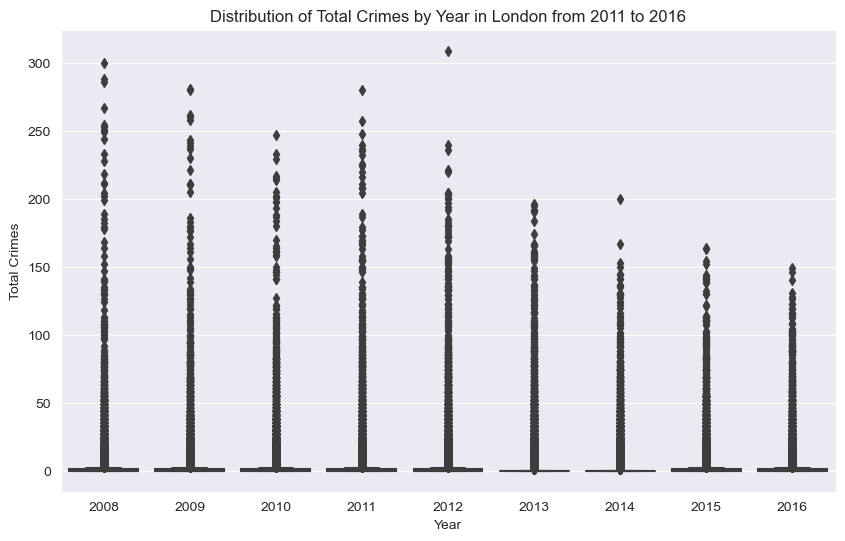

In [121]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.boxplot(data=crime_data, x='year', y='value')
plt.title('Distribution of Total Crimes by Year in London from 2011 to 2016')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.show()


#### scatter plot total kejahatan per tahun

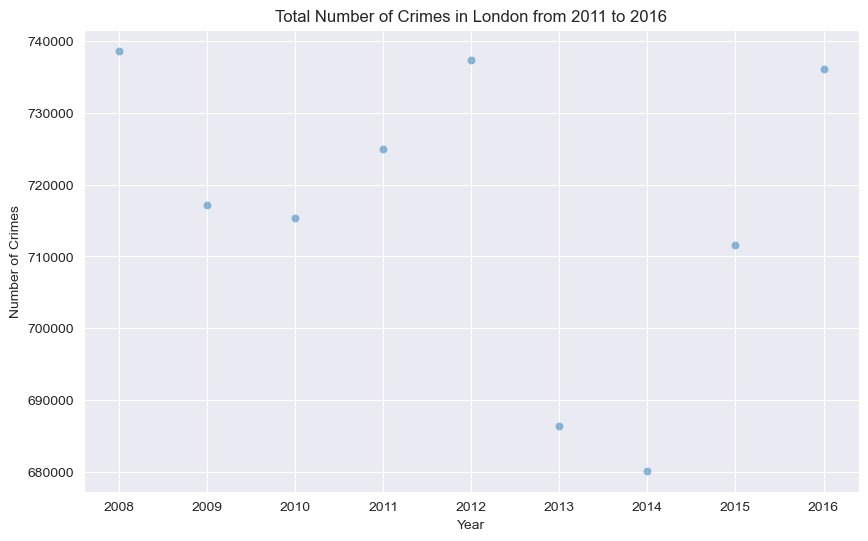

In [122]:
#grup data per tahun dan total kejatahan
total_crimes = crime_data.groupby('year')['value'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.scatterplot(data=total_crimes, x='year', y='value', alpha=0.5)
plt.title('Total Number of Crimes in London from 2011 to 2016')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

#### word cloud tipe kejahatan

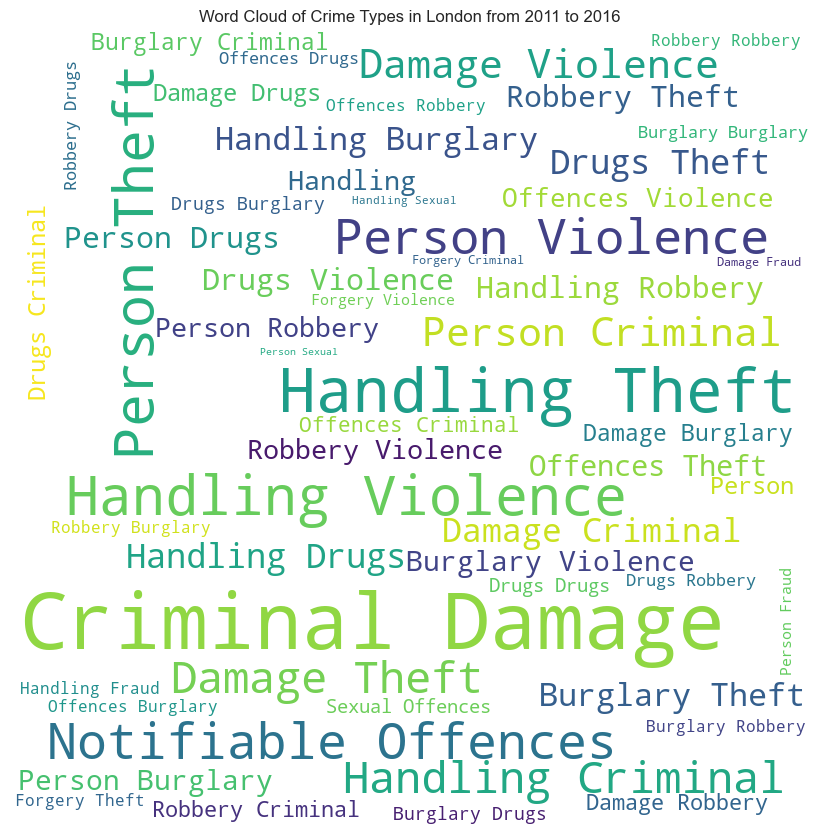

In [123]:
#ubah major kategori ke tipe string
crime_types = ' '.join(crime_data['major_category'])

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(crime_types)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Word Cloud of Crime Types in London from 2011 to 2016')
plt.show()

#### folium map

In [124]:
#folium map
world_map = folium.Map()
world_map

In [125]:
london_map = folium.Map(location=[51.5074, -0.1278], zoom_start=10)
london_map

In [126]:
london_map = folium.Map(location=[51.5074, -0.1278], zoom_start=11)
london_map

In [127]:
london_map = folium.Map(location=[51.5074, -0.1278], zoom_start=200)
london_map